### 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train.shape', X_train.shape)
print('y_train.shape', y_test.shape)
print('X_test.shape', X_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (10000,)
X_test.shape (60000, 28, 28)
y_test.shape (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

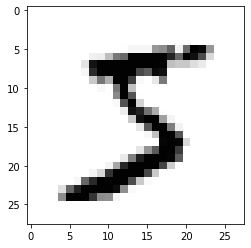

In [ ]:
# 2. 이미지 데이터 확인
plt.imshow(X_train[0], cmap='Greys')

In [ ]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 
print(X_train[0].shape)
X_train_reshaped = X_train.reshape(-1, 28*28)
X_test_reshaped = X_test.reshape(-1, 28*28)
print('X_train_reshaped.shape', X_train_reshaped.shape)
print('X_test_reshaped.shape',X_test_reshaped.shape)

(28, 28)
X_train_reshaped.shape (60000, 784)
X_test_reshaped.shape (10000, 784)


In [ ]:
print(X_train_reshaped[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
# 3-2. 데이터 전처리 : Normalzation 

X_train_reshaped = (X_train_reshaped - np.mean(X_train_reshaped))/ np.std(X_train_reshaped)
X_test_reshaped = (X_test_reshaped - np.mean(X_test_reshaped))/ np.std(X_test_reshaped)
print(X_train_reshaped[0])

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

In [ ]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils import to_categorical

print(y_train[:10])

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(y_train_encoded[:10])
#one-hot encoding-다른 방법도 많음

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
type(y_train[0])

numpy.uint8

In [ ]:
type(y_train_encoded)

numpy.ndarray

In [ ]:
type(y_train_encoded[0][0])

numpy.float32

In [ ]:
# 5. 모델 생성 : MLP
from tensorflow import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(512,input_dim=784, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. 모델 학습시키기
batch_size = 64
epochs = 50

history = model.fit(X_train_reshaped, y_train_encoded,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
750/750 [==============================] - 7s 9ms/step - loss: 0.2136 - accuracy: 0.9349 - val_loss: 0.1138 - val_accuracy: 0.9659
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0872 - accuracy: 0.9731 - val_loss: 0.0988 - val_accuracy: 0.9705
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0896 - val_accuracy: 0.9736
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0429 - accuracy: 0.9858 - val_loss: 0.0845 - val_accuracy: 0.9765
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0930 - val_accuracy: 0.9761
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0917 - val_accuracy: 0.9778
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.1012 - val_accuracy: 0.9737
Epoch 

In [ ]:
# 8. 모델 평가
loss_test, acc_test = model.evaluate(X_test_reshaped, y_test_encoded)

print('loss_test',loss_test)
print('acc_test',acc_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.9806
loss_test 0.18803833425045013
acc_test 0.9805999994277954


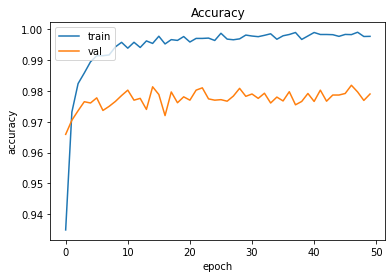

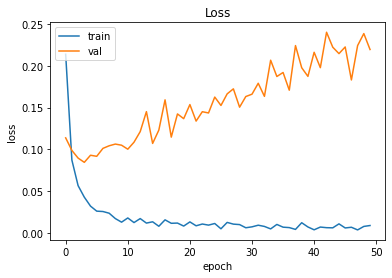

In [ ]:
# 9. 학습 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()


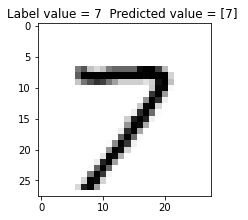

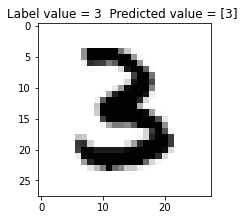

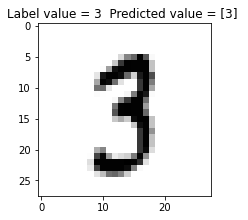

In [ ]:
# 10. 이미지 랜덤 선택 -> 훈련된 모델로 예측
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 784)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()
